# Zero to Hero

## 2.01 Optimizacion Bayesiana

### Advertencia

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### El código

In [33]:
#Ejemplo de optimizacion bayesiana, univariada
#install.packages("mlr")    
#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection
require("mlr")   #load package
library("mlr")   #load package
#install.packages("mlrMBO")
#install.packages("DiceKriging")
require("data.table")
#paquetes necesarios para la Bayesian Optimization
require("DiceKriging")
require("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,2154562,115.1,4062371,217,4062371,217
Vcells,3731477,28.5,8388608,64,8388608,64


### Defino la funcion a optimizar, un polinomio de grado 4

In [34]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

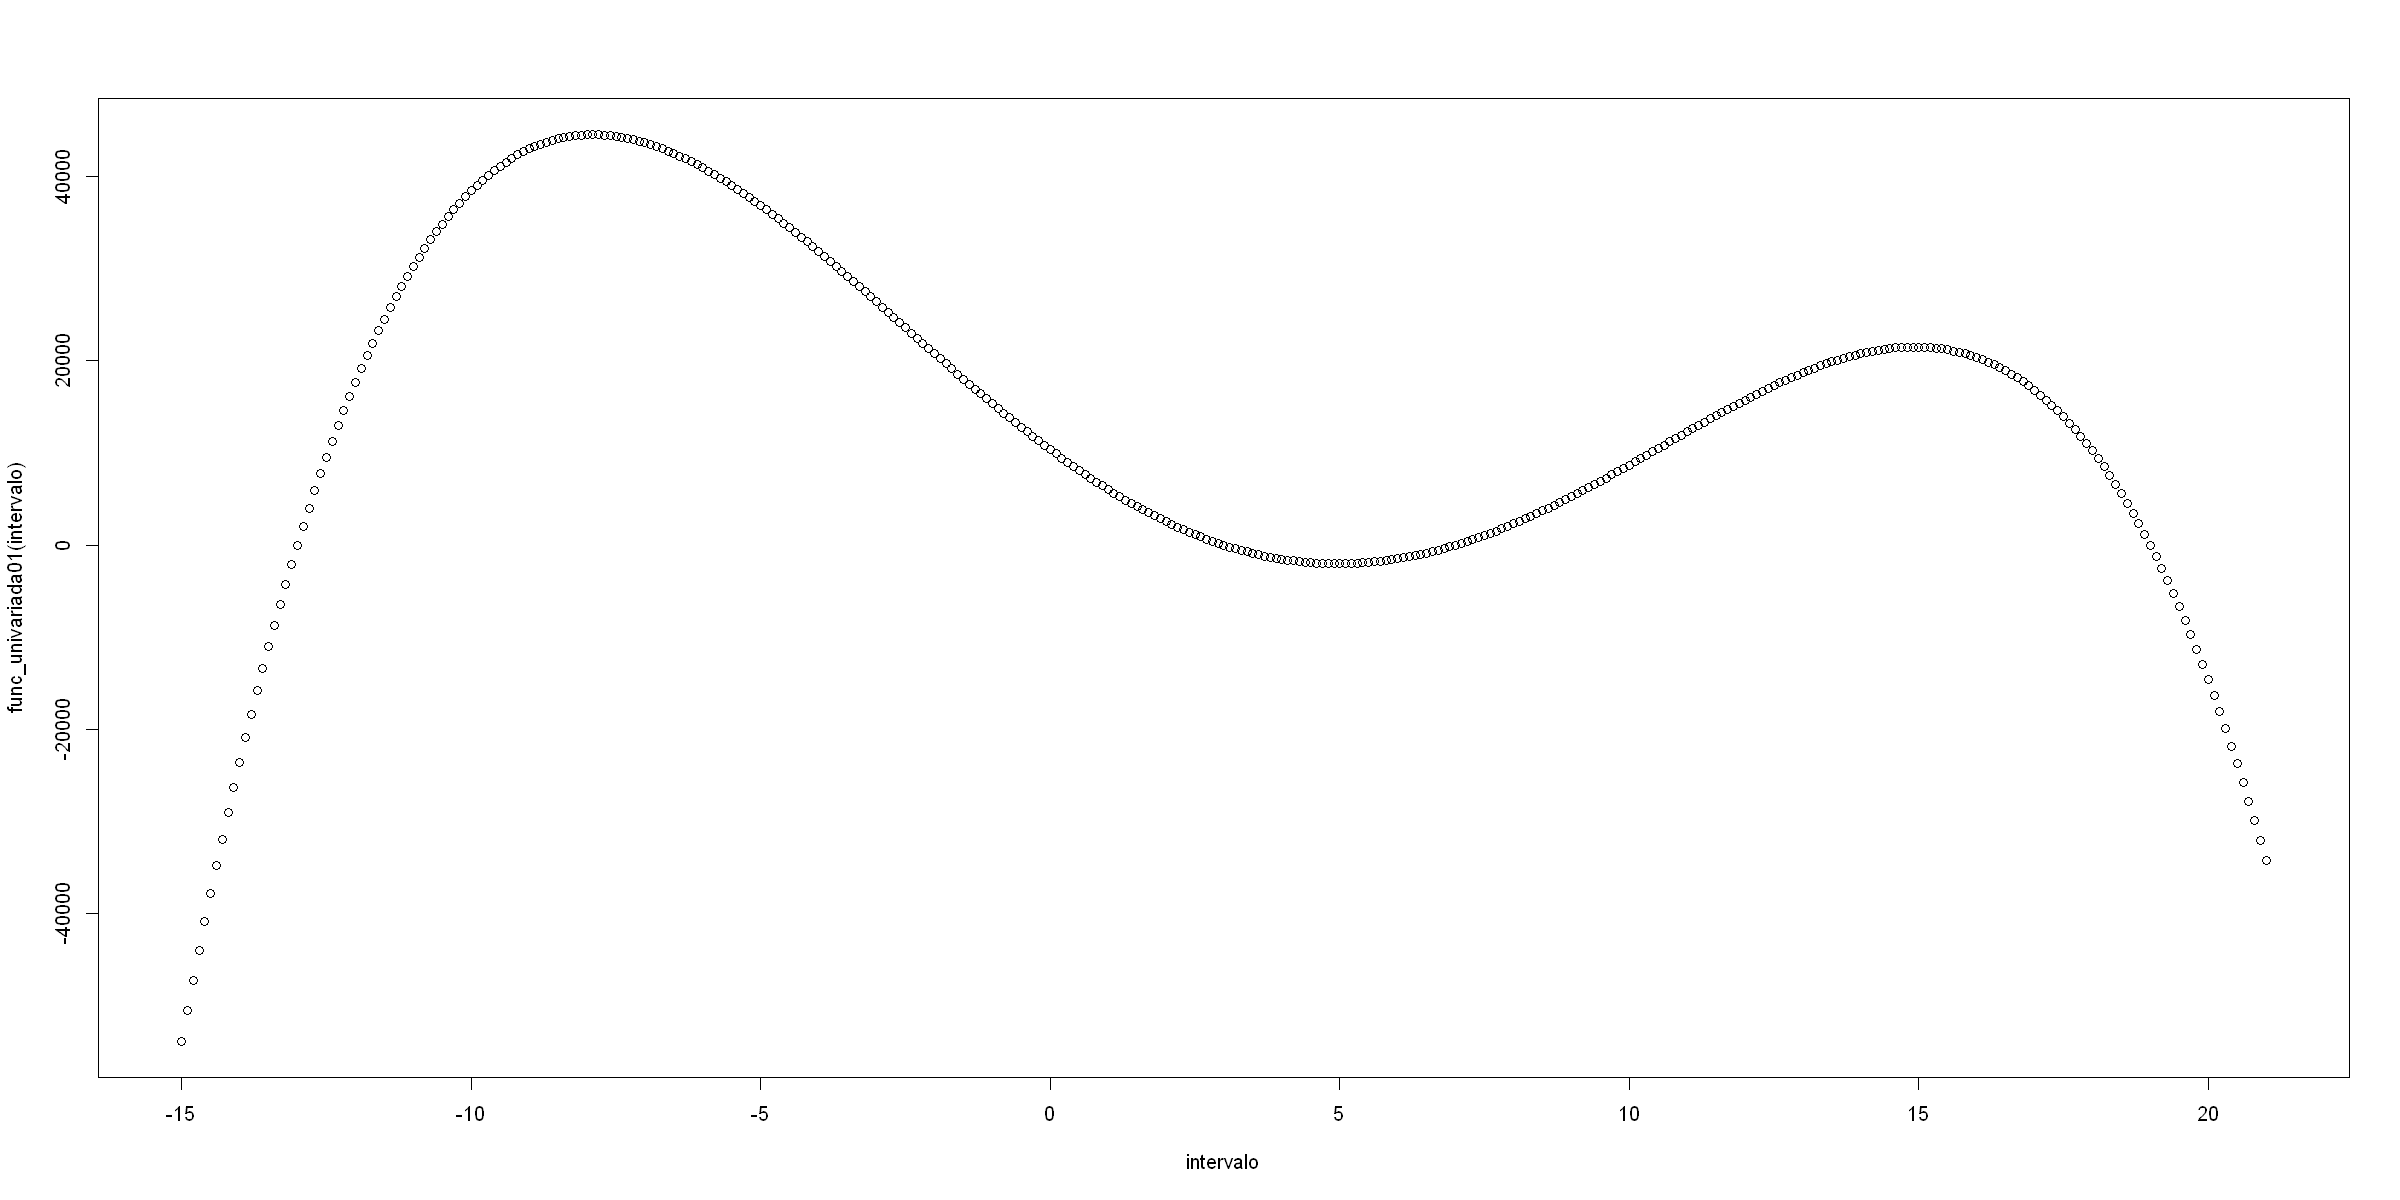

In [35]:
intervalo  <- seq(-15,21,0.1)
plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [36]:
obj.fun  <- makeSingleObjectiveFunction(
              fn=       func_univariada01,
              minimize= FALSE,   #estoy Maximizando la ganancia
              par.set=  makeParamSet(  makeNumericParam( "x", lower= -100, upper=  100) ),
             )

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [38]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [39]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 25 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [40]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=20.6 : y = -2.53e+04 : 0.0 secs : initdesign

[mbo] 0: x=-62.8 : y = -3.75e+07 : 0.0 secs : initdesign

[mbo] 0: x=97.4 : y = -1.48e+08 : 0.0 secs : initdesign

[mbo] 0: x=-17.1 : y = -1.43e+05 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -76.96301 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       76.963  |proj g|=    0.0014719
At iterate     1  f =       76.963  |proj g|=     0.0014713
At iterate     2  f =        76.96  |proj g|=     0.0001022
At iterate     3  f =        76.96  |proj g|=    7.9533e-06
At iterate     4  f =        76.96  |proj g|=    4.8867e-08

iterations 4
function evaluations 5
segments explored during Cauchy searches 4
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.88665e-08
final function value 76.96

F = 76.96
final  value 76.960043 
converged


[mbo] 1: x=2.95 : y = 96.7 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -94.41067 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       94.411  |proj g|=    0.0017891
At iterate     1  f =       94.411  |proj g|=     0.0017885
At iterate     2  f =       94.405  |proj g|=    0.00018959
At iterate     3  f =       94.405  |proj g|=    2.3004e-05
At iterate     4  f =       94.405  |proj g|=    3.4966e-07
At iterate     5  f =       94.405  |proj g|=    6.5788e-10

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 6.57881e-10
final functio

[mbo] 2: x=13 : y = 1.88e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -110.3614 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       110.36  |proj g|=    0.0018489
At iterate     1  f =       110.36  |proj g|=     0.0018487
At iterate     2  f =       110.35  |proj g|=    0.00089136
At iterate     3  f =       110.34  |proj g|=    0.00023315
At iterate     4  f =       110.34  |proj g|=    2.2342e-05
At iterate     5  f =       110.34  |proj g|=    6.3769e-07
At iterate     6  f =       110.34  |proj g|=    1.6828e-09

iterations 6
function evaluations 7
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

[mbo] 3: x=-8.18 : y = 4.45e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -126.0735 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       126.07  |proj g|=   0.00025092
At iterate     1  f =       126.07  |proj g|=     0.0002509

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000250899
final function value 126.074

F = 126.074
final  value 126.073537 
converged


[mbo] 4: x=17.2 : y = 1.56e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -140.3594 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       140.36  |proj g|=   2.4677e-05
At iterate     1  f =       140.36  |proj g|=    2.4675e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 2.46753e-05
final function value 140.359

F = 140.359
final  value 140.359353 
converged


[mbo] 5: x=-12.8 : y = 4.6e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -154.6883 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       154.69  |proj g|=   0.00065776
At iterate     1  f =       154.69  |proj g|=    0.00065774
At iterate     2  f =       154.68  |proj g|=    0.00015206
At iterate     3  f =       154.68  |proj g|=    2.6143e-05
At iterate     4  f =       154.68  |proj g|=    8.5512e-07
At iterate     5  f =       154.68  |proj g|=    5.0143e-09

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 5.01434e-09
final functio

[mbo] 6: x=-2.61 : y = 2.42e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -168.9926 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       168.99  |proj g|=    0.0001034
At iterate     1  f =       168.99  |proj g|=    0.00010339

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000103393
final function value 168.993

F = 168.993
final  value 168.992556 
converged


[mbo] 7: x=8.04 : y = 2.4e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -183.0286 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       183.03  |proj g|=   4.4208e-05
At iterate     1  f =       183.03  |proj g|=    4.4207e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 4.42066e-05
final function value 183.029

F = 183.029
final  value 183.028639 
converged


[mbo] 8: x=-25.3 : y = -1e+06 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -198.776 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       198.78  |proj g|=   0.00027475
At iterate     1  f =       198.78  |proj g|=    0.00027474

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.00027474
final function value 198.776

F = 198.776
final  value 198.775969 
converged


[mbo] 9: x=-5.45 : y = 3.89e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -211.9398 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       211.94  |proj g|=   0.00093336
At iterate     1  f =       211.94  |proj g|=    0.00093333
At iterate     2  f =       211.93  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 211.931

F = 211.931
final  value 211.931090 
converged


[mbo] 10: x=0.158 : y = 9.64e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -225.017 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       225.02  |proj g|=    0.0017095
At iterate     1  f =       225.02  |proj g|=     0.0017094
At iterate     2  f =          225  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 224.999

F = 224.999
final  value 224.998699 
converged


[mbo] 11: x=-10.4 : y = 3.57e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -237.778 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       237.78  |proj g|=     0.002357
At iterate     1  f =       237.78  |proj g|=     0.0023569
At iterate     2  f =       237.76  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 237.758

F = 237.758
final  value 237.757788 
converged


[mbo] 12: x=10.6 : y = 1.09e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -250.7149 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       250.71  |proj g|=    0.0036917
At iterate     1  f =       250.71  |proj g|=     0.0036915
At iterate     2  f =       250.64  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 250.642

F = 250.642
final  value 250.641957 
converged


[mbo] 13: x=19 : y = 196 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -263.2528 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       263.25  |proj g|=    0.0044572
At iterate     1  f =       263.25  |proj g|=      0.004457
At iterate     2  f =       263.16  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 263.164

F = 263.164
final  value 263.163738 
converged


[mbo] 14: x=5.5 : y = -1.88e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -275.9397 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       275.94  |proj g|=    0.0041863
At iterate     1  f =       275.94  |proj g|=     0.0041861
At iterate     2  f =       275.93  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 275.931

F = 275.931
final  value 275.931292 
converged


[mbo] 15: x=15.1 : y = 2.15e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -288.4255 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       288.43  |proj g|=    0.0053089
At iterate     1  f =       288.43  |proj g|=     0.0053086
At iterate     2  f =       288.38  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 288.375

F = 288.375
final  value 288.375032 
converged


[mbo] 16: x=-6.84 : y = 4.34e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -300.2902 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       300.29  |proj g|=    0.0059047
At iterate     1  f =       300.29  |proj g|=     0.0059044
At iterate     2  f =       300.25  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 300.247

F = 300.247
final  value 300.247140 
converged


[mbo] 17: x=-20.5 : y = -3.84e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -313.8363 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       313.84  |proj g|=    0.0064571
At iterate     1  f =       313.84  |proj g|=     0.0064567
At iterate     2  f =        313.8  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 313.801

F = 313.801
final  value 313.800733 
converged


[mbo] 18: x=-4.07 : y = 3.23e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -325.93 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       325.93  |proj g|=    0.0095406
At iterate     1  f =       325.93  |proj g|=     0.0095397
At iterate     2  f =       325.64  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 325.638

F = 325.638
final  value 325.638487 
converged


[mbo] 19: x=-9.26 : y = 4.21e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -337.1827 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       337.18  |proj g|=    0.0082078
At iterate     1  f =       337.18  |proj g|=     0.0082072
At iterate     2  f =        337.1  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 337.104

F = 337.104
final  value 337.103644 
converged


[mbo] 20: x=-14.5 : y = -3.88e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -349.5102 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       349.51  |proj g|=    0.0085372
At iterate     1  f =       349.51  |proj g|=     0.0085366
At iterate     2  f =       349.47  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 349.471

F = 349.471
final  value 349.470609 
converged


[mbo] 21: x=-1.26 : y = 1.68e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -361.4238 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       361.42  |proj g|=      0.01074
At iterate     1  f =       361.42  |proj g|=      0.010739
At iterate     2  f =       361.21  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 361.209

F = 361.209
final  value 361.208531 
converged


[mbo] 22: x=24.5 : y = -1.56e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -376.295 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       376.29  |proj g|=    0.0093312
At iterate     1  f =       376.29  |proj g|=     0.0093304
At iterate     2  f =       376.29  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 376.288

F = 376.288
final  value 376.288331 
converged


[mbo] 23: x=22.5 : y = -7.67e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -388.8674 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       388.87  |proj g|=      0.01046
At iterate     1  f =       388.87  |proj g|=      0.010459
At iterate     2  f =        388.8  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 388.801

F = 388.801
final  value 388.800600 
converged


[mbo] 24: x=-11.4 : y = 2.53e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -400.4399 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       400.44  |proj g|=     0.012189
At iterate     1  f =       400.44  |proj g|=      0.012187
At iterate     2  f =       400.24  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 400.245

F = 400.245
final  value 400.244983 
converged


[mbo] 25: x=-7.52 : y = 4.44e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  320.4454 
  - best initial criterion value(s) :  -410.9979 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=          411  |proj g|=     0.012012
At iterate     1  f =          411  |proj g|=      0.012011
At iterate     2  f =       410.91  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 410.905

F = 410.905
final  value 410.905063 
converged


In [41]:
tb_resultados  <- as.data.table( run$opt.path )

In [42]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
20.5796895,-2.532675e+04,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
-62.8387070,-3.750879e+07,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
97.3840076,-1.476229e+08,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
-17.0860793,-1.426717e+05,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
2.9533243,9.670653e+01,1,NA,NA,0,-10669703.759,NA,0.03,infill_ei,0.22,16226092.21,7129064.749
13.0306586,1.879904e+04,2,NA,NA,0,-2245823.851,NA,0.02,infill_ei,0.09,3653495.42,1373191.747
-8.1840381,4.446445e+04,3,NA,NA,0,-1591644.194,NA,0.00,infill_ei,0.10,2910028.25,797569.370
17.2295397,1.558098e+04,4,NA,NA,0,-376909.899,NA,0.00,infill_ei,0.10,624137.64,268540.918
-12.7675826,4.602581e+03,5,NA,NA,0,-334017.867,NA,0.00,infill_ei,0.10,683573.78,159396.207


In [43]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-8.184038,44464.45,3,NA,NA,0,-1591644,NA,0,infill_ei,0.1,2910028,797569.4


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?